Coupling of mean and variance estimate

$$
\frac{d}{d\tau}\big[\begin{array}{c}
w\\
b
\end{array}\big]=-2\eta\bigg(\big[\begin{array}{cc}
\mu^{2}+\sigma^{2}+\lambda\  & \ \mu\\
\mu\  & \ 1
\end{array}\big]\ \big[\begin{array}{c}
w\\
b
\end{array}\big]-\big[\begin{array}{c}
\lambda+\mu^{2}\\
\mu
\end{array}\big]\bigg)

$$

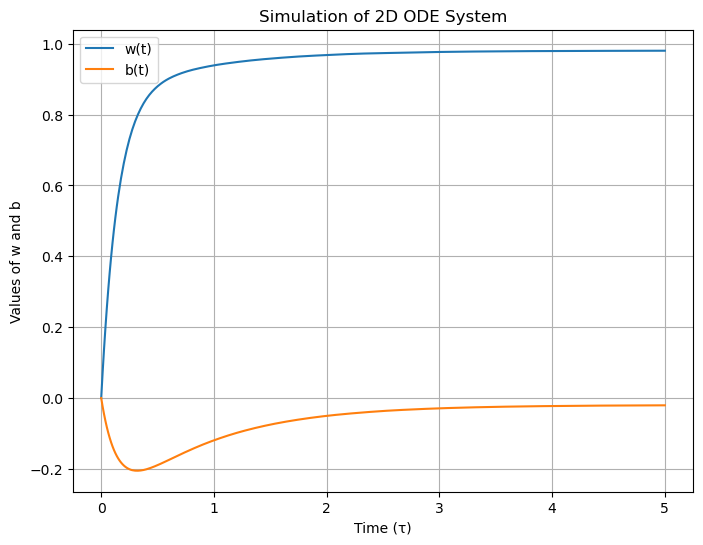

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define parameters
mu = -1.0  # example value for mu
sigma = 0.2  # example value for sigma
lambda_ = 2.0  # example value for lambda
eta = 1.0  # example value for eta

# Define the ODE system
def ode_system(t, y):
    w, b = y
    A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                  [mu, 1]])
    B = np.array([lambda_ + mu**2, mu])
    dydt = -2 * eta * (A @ np.array([w, b]) - B)
    return dydt

# Initial conditions
y0 = [0, 0]  # starting values for w and b

# Time span for the simulation
t_span = [0, 5]
t_eval = np.linspace(t_span[0], t_span[1], 400)

# Solve the ODE system
sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0], label='w(t)')
plt.plot(sol.t, sol.y[1], label='b(t)')
plt.xlabel('Time (τ)')
plt.ylabel('Values of w and b')
plt.title('Simulation of 2D ODE System')
plt.legend()
plt.grid(True)
plt.show()

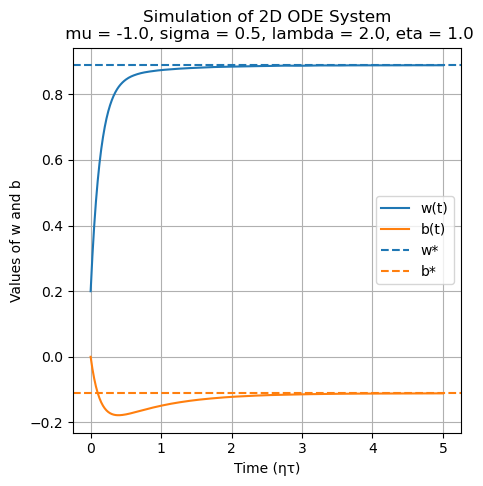

In [7]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def simulate_ode(mu, sigma, lambda_, eta, y0, t_span=(0, 5), pnts=400, logscale=False):
    # Define the ODE system
    def ode_system(t, y):
        w, b = y
        A = np.array([[mu**2 + sigma**2 + lambda_, mu],
                      [mu, 1]])
        B = np.array([lambda_ + mu**2, mu])
        dydt = -2 * eta * (A @ np.array([w, b]) - B)
        return dydt
    t_eval = np.linspace(t_span[0], t_span[1], pnts)
    # Solve the ODE system
    sol = solve_ivp(ode_system, t_span, y0, t_eval=t_eval)
    w_star = lambda_ / (lambda_ + sigma**2)
    b_star = (1 - w_star) * mu
    # Plot the results
    plt.figure(figsize=(5, 5))
    plt.plot(sol.t, sol.y[0], label='w(t)')
    plt.plot(sol.t, sol.y[1], label='b(t)')
    plt.axhline(y=w_star, color='C0', linestyle='--', label='w*')
    plt.axhline(y=b_star, color='C1', linestyle='--', label='b*')
    if logscale:
        plt.xscale('log')
    plt.xlabel('Time (ητ)')
    plt.ylabel('Values of w and b')
    plt.title('Simulation of 2D ODE System\n mu = {}, sigma = {}, lambda = {}, eta = {}'.format(mu, sigma, lambda_, eta))
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
mu = -1.0
sigma = 0.2
lambda_ = 2.0
eta = 1.0
y0 = [1, 0]
t_span = [0, 5]

simulate_ode(mu = -1.0, sigma = 0.5, lambda_ = 2.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

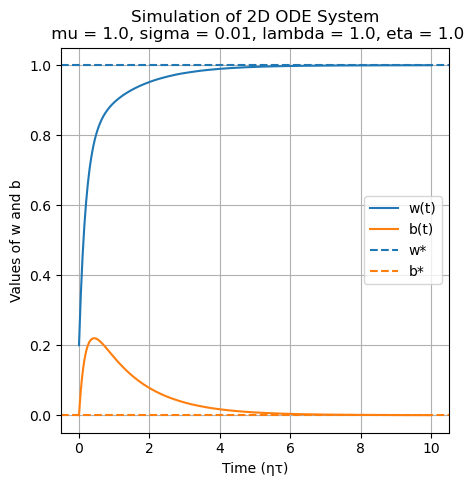

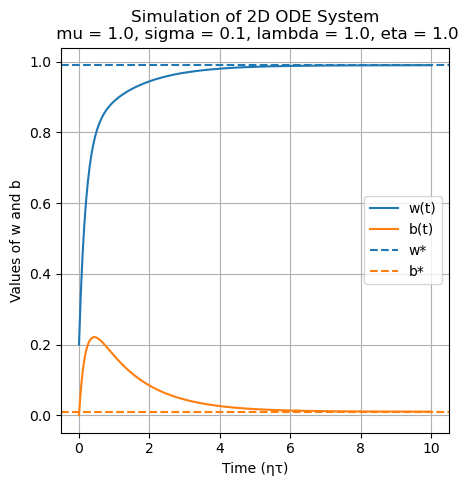

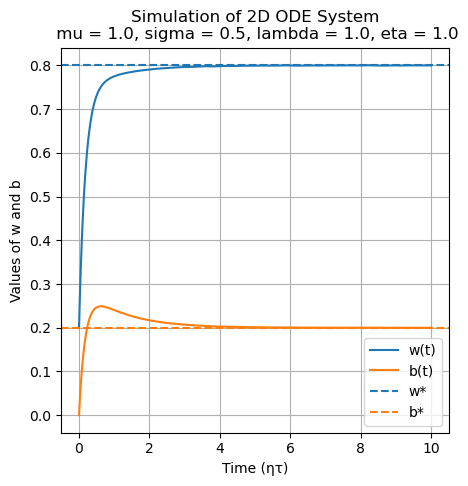

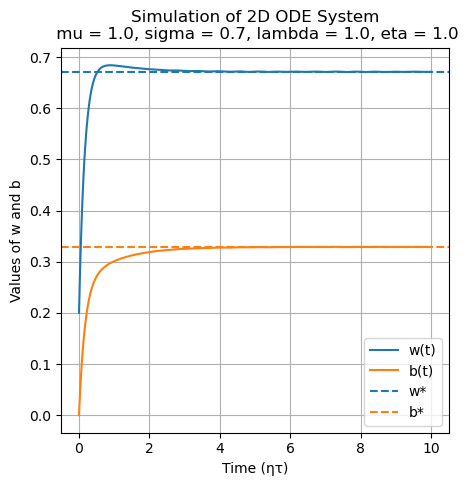

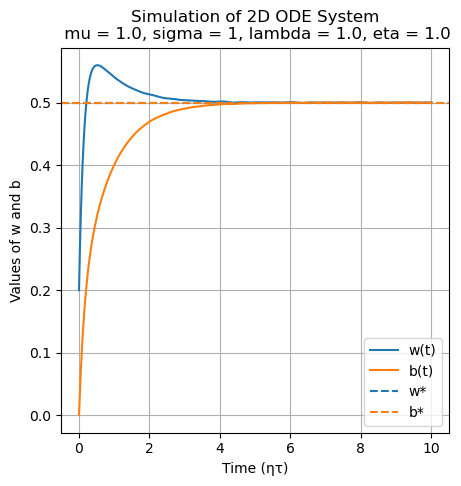

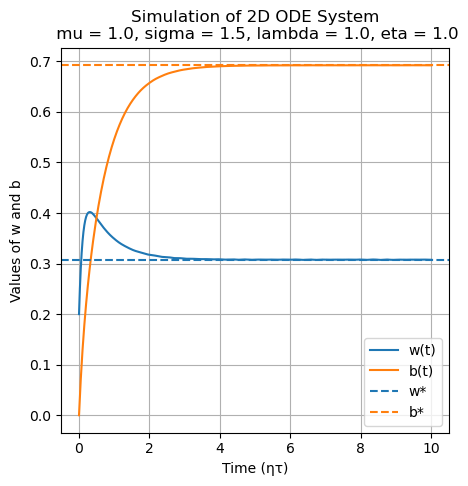

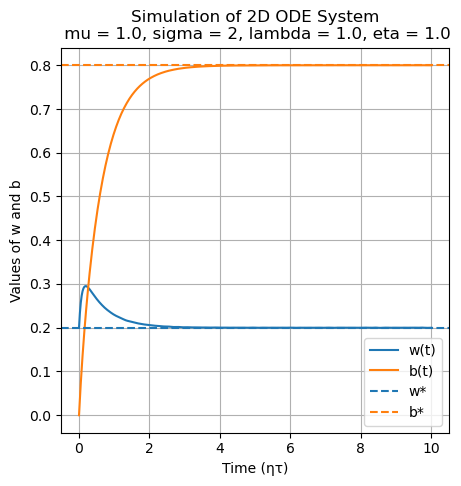

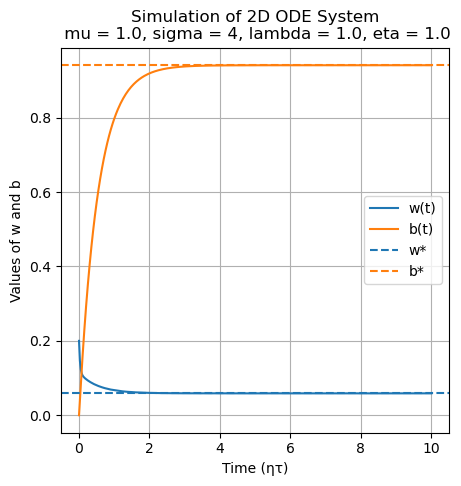

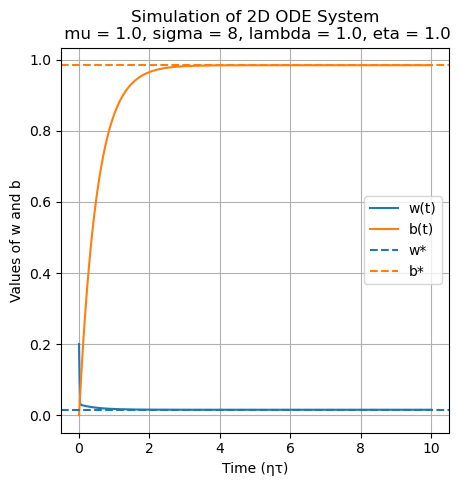

In [12]:
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    simulate_ode(mu = 1.0, sigma = sigma, lambda_ = 1.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 10], logscale=False)

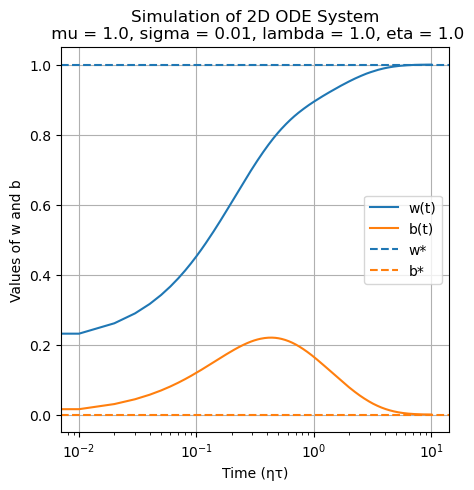

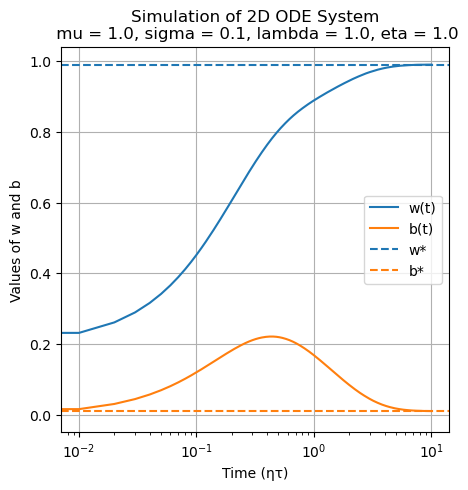

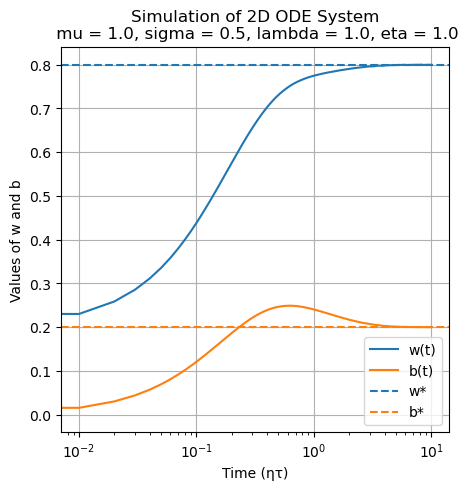

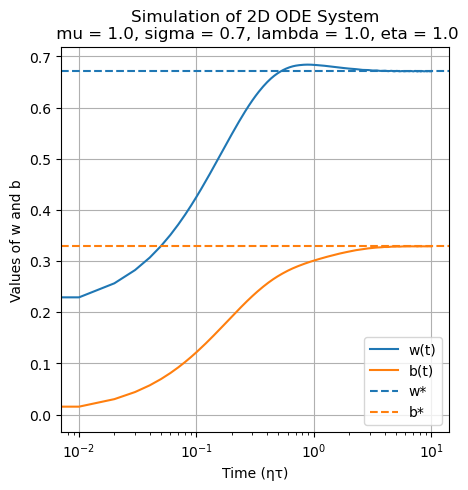

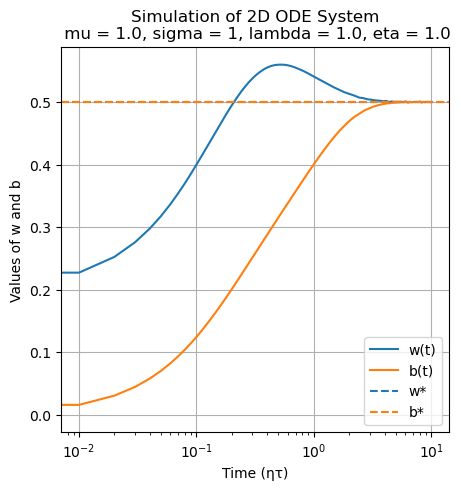

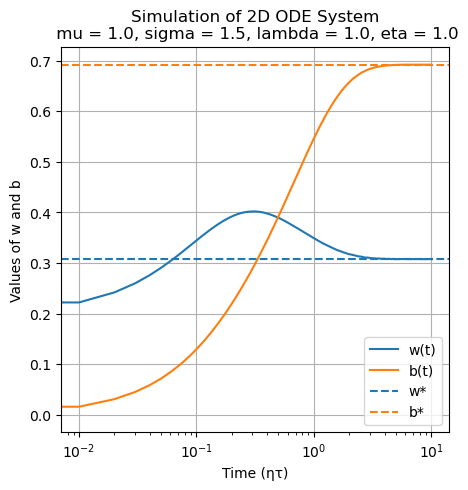

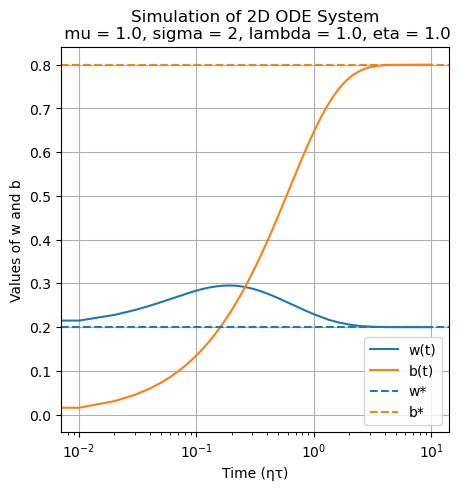

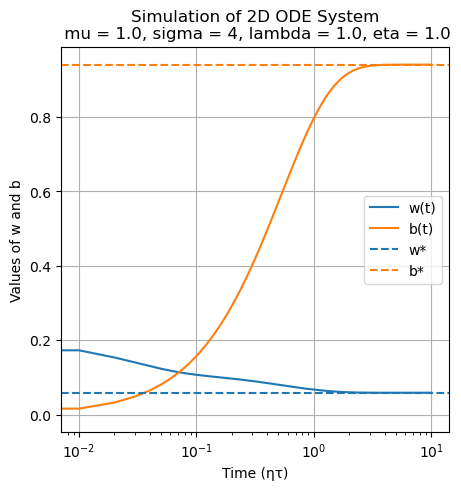

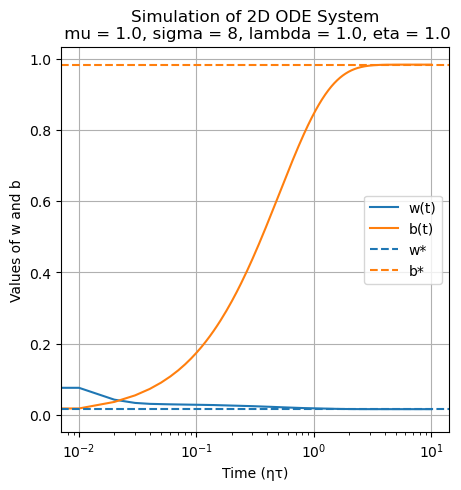

In [11]:
for sigma in [0.01, 0.1, 0.5, 0.7, 1, 1.5, 2, 4, 8]:
    simulate_ode(mu = 1.0, sigma = sigma, lambda_ = 1.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 10], logscale=True, pnts=1000)

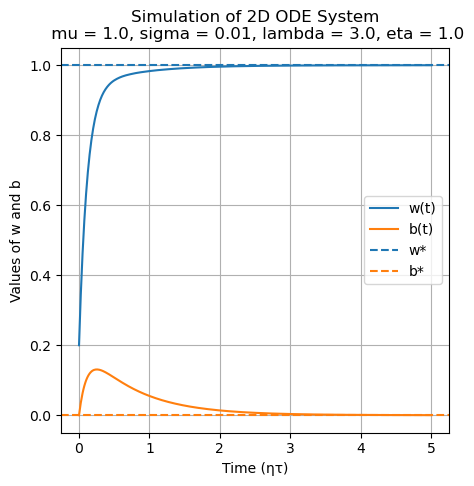

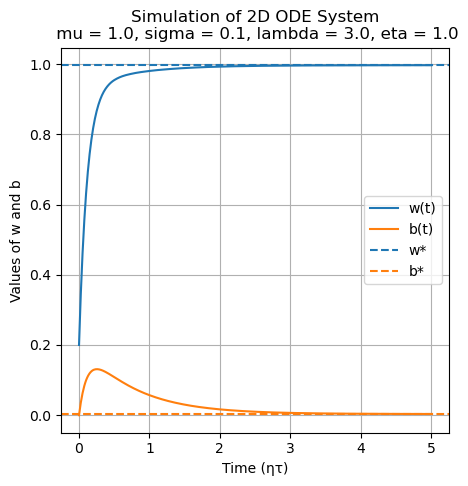

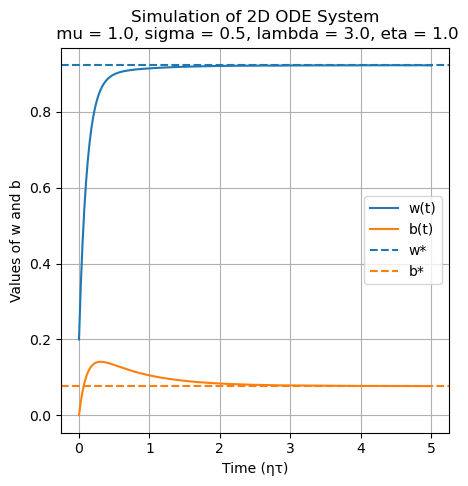

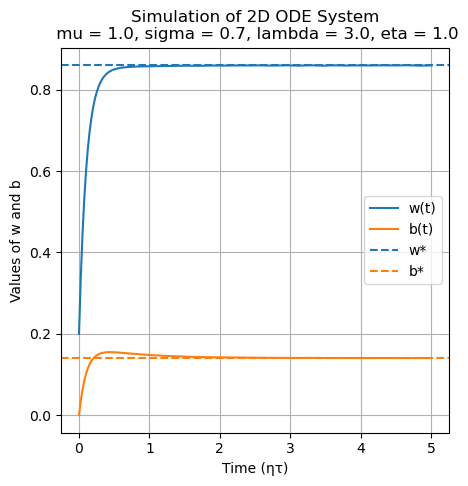

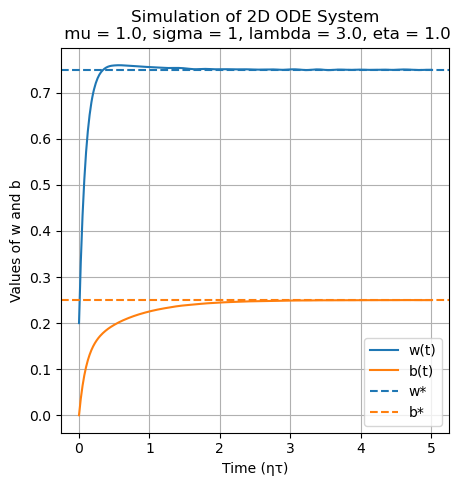

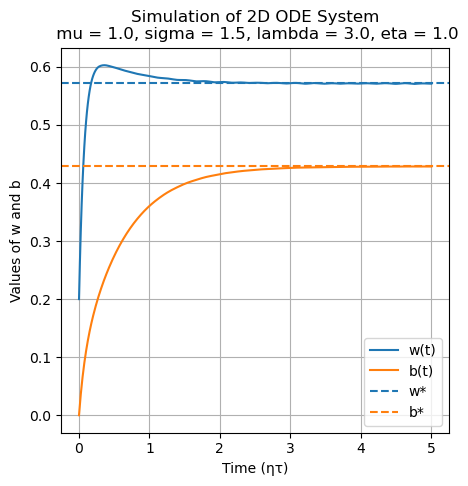

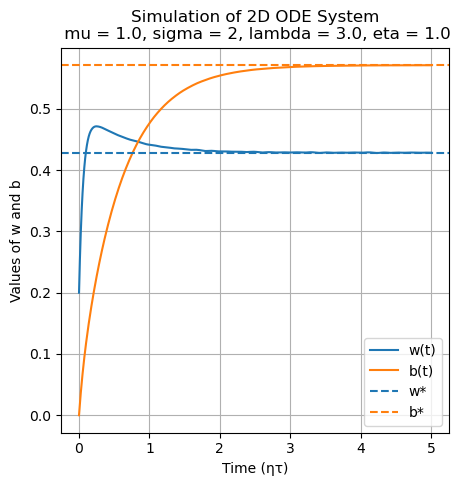

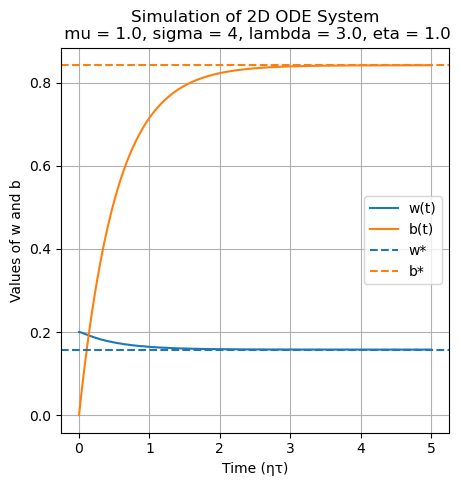

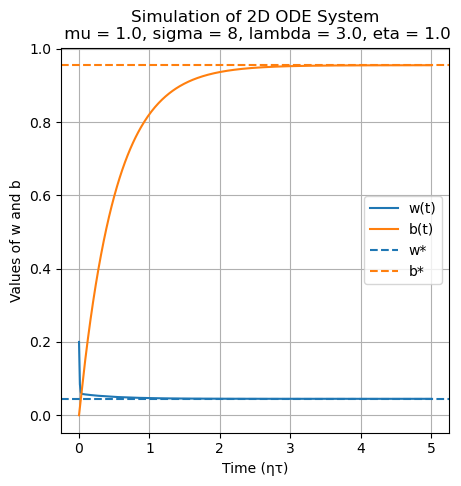

In [4]:
simulate_ode(mu = 1.0, sigma = 0.01, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.1, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.5, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.7, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1.5, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 2, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 4, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 8, lambda_ = 3.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

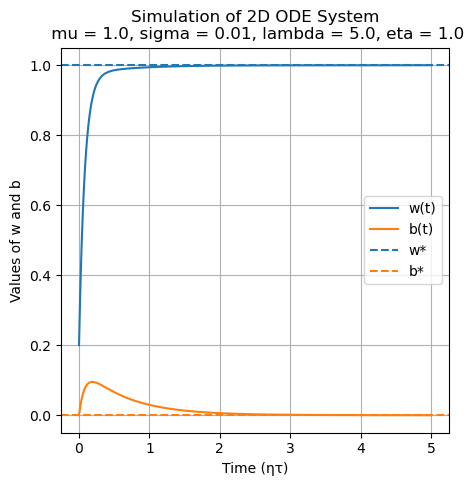

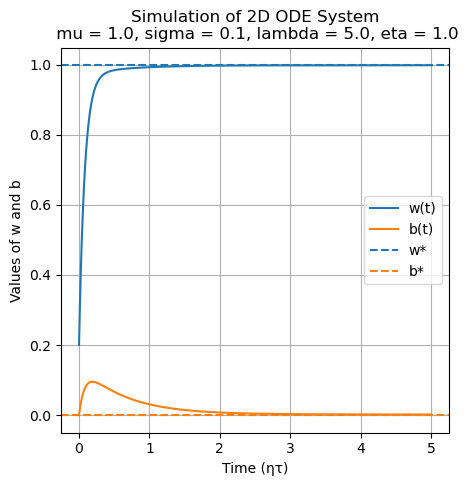

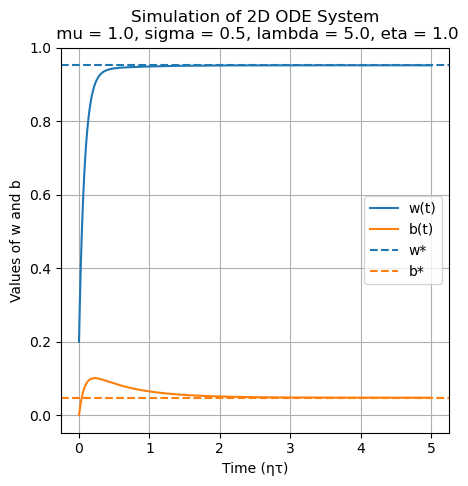

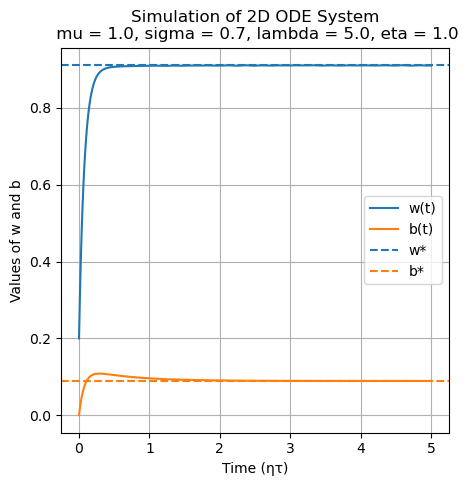

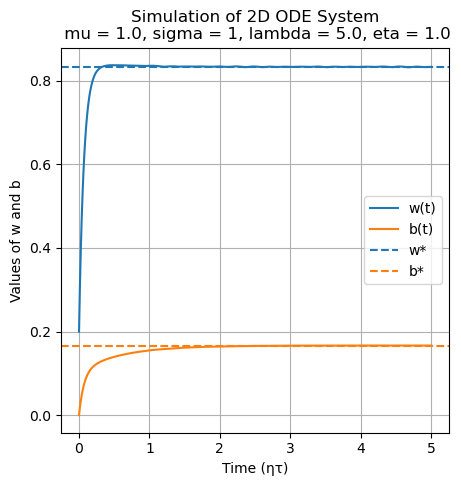

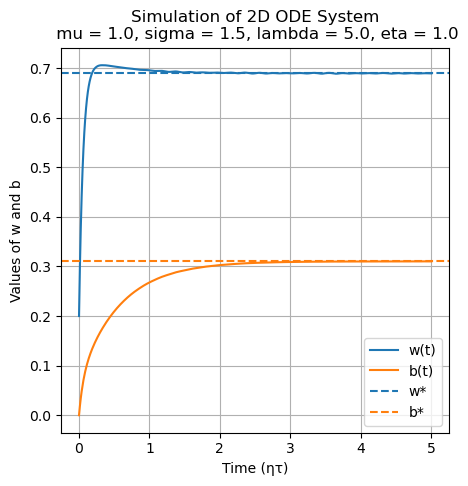

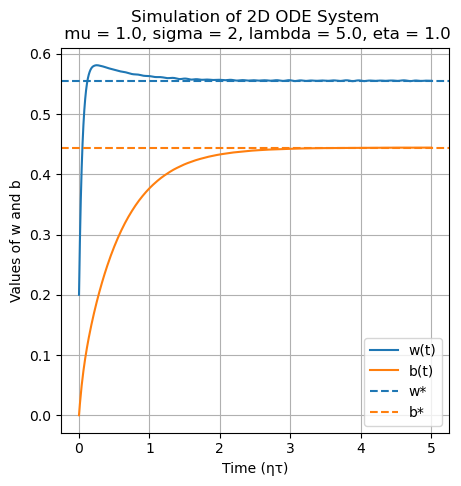

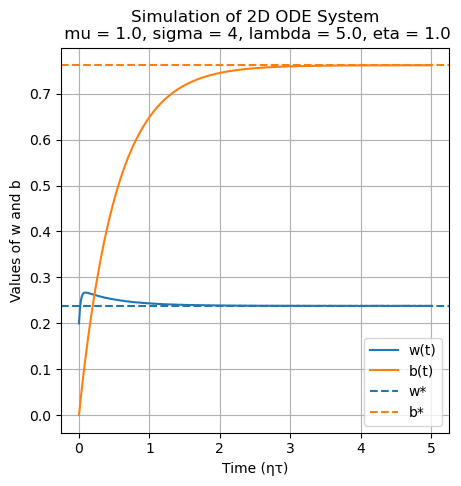

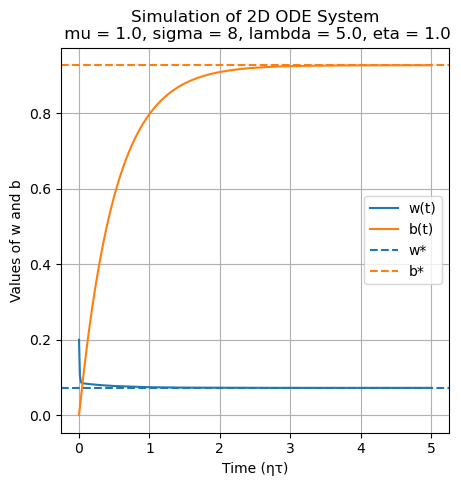

In [5]:
simulate_ode(mu = 1.0, sigma = 0.01, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.1, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.5, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 0.7, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 1.5, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 2, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 4, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])
simulate_ode(mu = 1.0, sigma = 8, lambda_ = 5.0, eta = 1.0, y0= [0.2, 0], t_span= [0, 5])

### Multi dimensional case

In [ ]:
import numpy as np

def generate_Q_matrix(sigma2, lambdas, c):
    n = len(lambdas) + 1  # The size of the matrix is determined by the length of lambdas
    Q = np.zeros((n, n))  # Initialize an n x n matrix with zeros

    # Fill the diagonal elements
    for i in range(n-1):
        Q[i, i] = sigma2 + lambdas[i] + c[i]**2
    
    # Fill the last diagonal element
    Q[n-1, n-1] = 1
    
    # Fill the off-diagonal elements
    for i in range(n-1):
        for j in range(i+1, n-1):
            Q[i, j] = Q[j, i] = c[i] * c[j]
    
    # Fill the last row and column
    for i in range(n-1):
        Q[i, n-1] = Q[n-1, i] = c[i]

    return Q

# Example usage
sigma2 = 1.0
lambdas = [0.5, 0.6, 0.7]
c = [1.0, 2.0, 3.0]

Q = generate_Q_matrix(sigma2, lambdas, c)
print(Q)